<a href="https://colab.research.google.com/github/bishair/Model/blob/main/GW4Model-FeaturesUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow pandas scikit-learn matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Prompt the user to select a file from their local computer
uploaded = files.upload()

Saving G4F.csv to G4F.csv


In [3]:
# Get a list of all files in the current working directory (where uploaded files are located)
uploaded_files = os.listdir()

# Print the list of uploaded files
print("Uploaded files:")
for file in uploaded_files:
    print(file)

Uploaded files:
.config
G4F.csv
sample_data


In [ ]:
#os.remove("")

In [4]:
data = pd.read_csv('G4F.csv', delimiter=';')

In [5]:
data.head()

,date,G4,RiverLevel,Recharge,Precipitation
0,02/06/2014,"110,72","110,659","5,00E-09",0
1,03/06/2014,"110,64","110,49","5,00E-09",0
2,04/06/2014,"110,54","110,391","5,00E-09",0
3,05/06/2014,"110,46","110,292","5,00E-09",0
4,06/06/2014,"110,41","110,234","5,00E-09",0


In [11]:
# RplacE commas with dots in excel
for col in ['G4', 'RiverLevel', 'Recharge', 'Precipitation']:
    data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Handle missing values (if any)
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
#Use fit_transform => calculate max and min for each feature and scale according to these values
data[['G4', 'RiverLevel', 'Recharge', 'Precipitation']] = scaler.fit_transform(data[['G4', 'RiverLevel', 'Recharge', 'Precipitation']])
print(data[['G4', 'RiverLevel', 'Recharge', 'Precipitation']])

# Split the data into features and target
X = data[['RiverLevel', 'Recharge', 'Precipitation']]
y = data['G4']
print('X',X)
print('y',y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: ignored

In [12]:
# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/100
3/3 [==============================] - 1s 106ms/step - loss: 0.1344 - val_loss: 0.1721
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1086 - val_loss: 0.1407
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0874 - val_loss: 0.1146
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0698 - val_loss: 0.0919
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0557 - val_loss: 0.0721
Epoch 6/100
3/3 [==============================] - 0s 37ms/step - loss: 0.0429 - val_loss: 0.0564
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0347 - val_loss: 0.0433
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0284 - val_loss: 0.0340
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0228 - val_loss: 0.0280
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0191 - val_loss: 0.0237
Epoch 11/100
3/3 [

1/1 [==============================] - 0s 82ms/step
Mean Squared Error (Original Scale): 0.010936257182176255


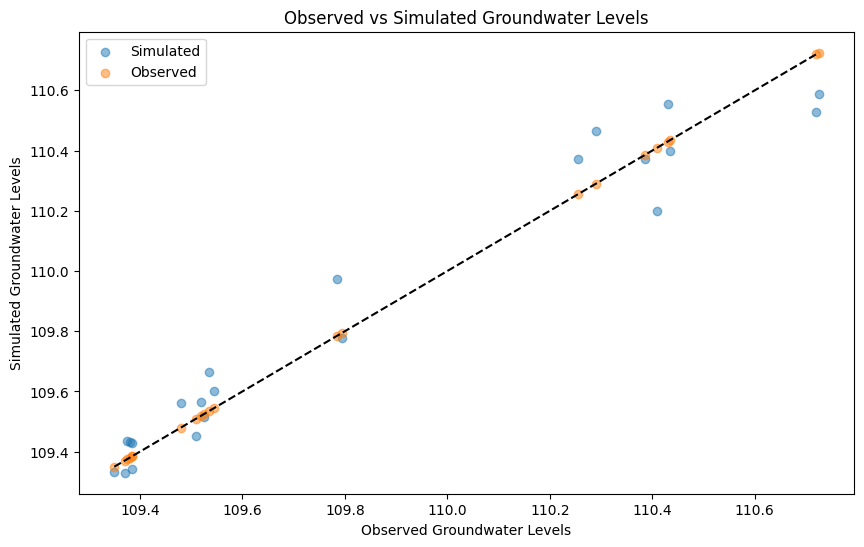

In [15]:
# Predict the groundwater levels on the test set
y_pred = model.predict(X_test).flatten()

# Create a DataFrame using test set features (excluding the target column) for the dummy data
dummy_data = X_test.copy()

# Add the predicted values as the target column (assuming 'G1' is the target)
dummy_data['G4'] = y_pred

# Apply inverse_transform to this DataFrame
rescaled_dummy_df = scaler.inverse_transform(dummy_data)

# Extract the rescaled predictions (assuming 'G1' is the first column)
y_pred_original = rescaled_dummy_df[:, 0]

# Extract the original y_test values
# Since 'G1' in 'data' is normalized, use the inverse_transform method to get the original y_test values
y_test_original_df = pd.DataFrame(data.loc[y_test.index, ['G4', 'RiverLevel', 'Recharge', 'Precipitation']], columns=['G4', 'RiverLevel', 'Recharge', 'Precipitation'])
y_test_original = scaler.inverse_transform(y_test_original_df)[:, 0]

# Calculate Mean Squared Error in original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error (Original Scale): {mse_original}")

# Plotting actual vs. predicted values in original scale
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5, label='Simulated')
plt.scatter(y_test_original, y_test_original, alpha=0.5, label='Observed')
plt.xlabel('Observed Groundwater Levels')
plt.ylabel('Simulated Groundwater Levels')
plt.title('Observed vs Simulated Groundwater Levels')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--') # Diagonal line
plt.legend()
plt.show()


